# 鈑金表面瑕疵檢測影像實作

## 背景：
鈑金噴漆完成後，運送碰撞造成刮痕，透過影像分析，進行瑕疵檢測
## 目的：
以各類濾波器，對各種鈑金表面瑕疵影像，進行影像前處理，凸顯瑕疵特徵、過濾雜訊，以利後續分析


#### 處理流程:
0. 讀取影像、選取ROI
1. [空間域中的濾波](#space)
    * 1.1 [平滑化影像、消除雜訊](#space1)
        * 1.1.1 均值濾波 (Mean filter)
        * 1.1.2 高斯濾波
        * 1.1.3 中值濾波
        * 1.1.4 比較
    * 1.2 [銳化線條：強化物體的邊緣位置](#space2)
        * 1.2.1 高通濾波 (High Pass Filter)
2. [傅立葉轉換](#fourier)
    * 2.1 低通濾波
    * 2.2 高通濾波
    
3. [方法介紹](#learn)： 
    * 3.1 雜訊
    * 3.2 低通濾波器：影像平滑化
        * 3.2.1 均值濾波 (Mean Filter)
        * 3.2.2 高斯濾波 (Gaussian Filter)
        * 3.2.3 中值濾波 (Median Filter)
        * 3.2.4 平滑濾波器處理雜訊影像
    * 3.3 高通濾波器(High Pass Filter)：影像銳化
    * 3.4 傅立葉轉換
        * 3.4.1 不同影像的傅立葉轉換比較
        * 3.4.2 頻率域上的濾波

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 讀取影像

先取單通道影像處理

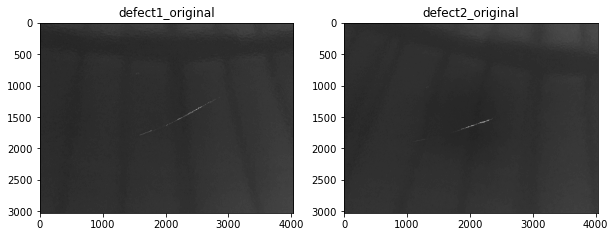

(3024, 4032)


In [2]:
# 瑕疵1
defect1 = cv2.imread('./images/defect1.jpg', 0)
# 瑕疵2
defect2 = cv2.imread('./images/defect2.jpg', 0)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1_original")

plt.subplot(122)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2_original")
plt.show()

# 影像尺寸
print(defect1.shape)

## 調整影像尺寸

影像尺寸較大，需要更多的運算時間，在不影響辨識需要資訊量的條件下，可以適度縮小影像尺寸

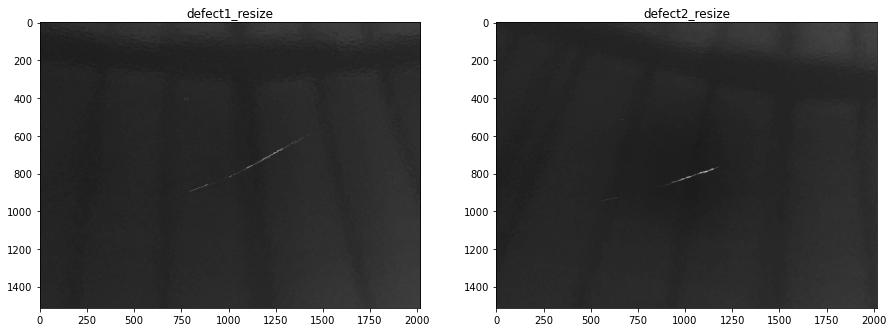

In [3]:
# 縮小百分之五十
scale_percent = 50 # percent of original size
width = int(defect1.shape[1] * scale_percent / 100)
height = int(defect1.shape[0] * scale_percent / 100)
dim = (width, height)

defect1 = cv2.resize(defect1, dim )
defect2 = cv2.resize(defect2, dim )


plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1_resize")

plt.subplot(122)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2_resize")
plt.show()

## 1. 空間域中的濾波 <a id='space'></a>

### 1.1 平滑化影像、消除雜訊 <a id = 'space1'></a>

### 1.1.1 均值濾波 (Mean filter)

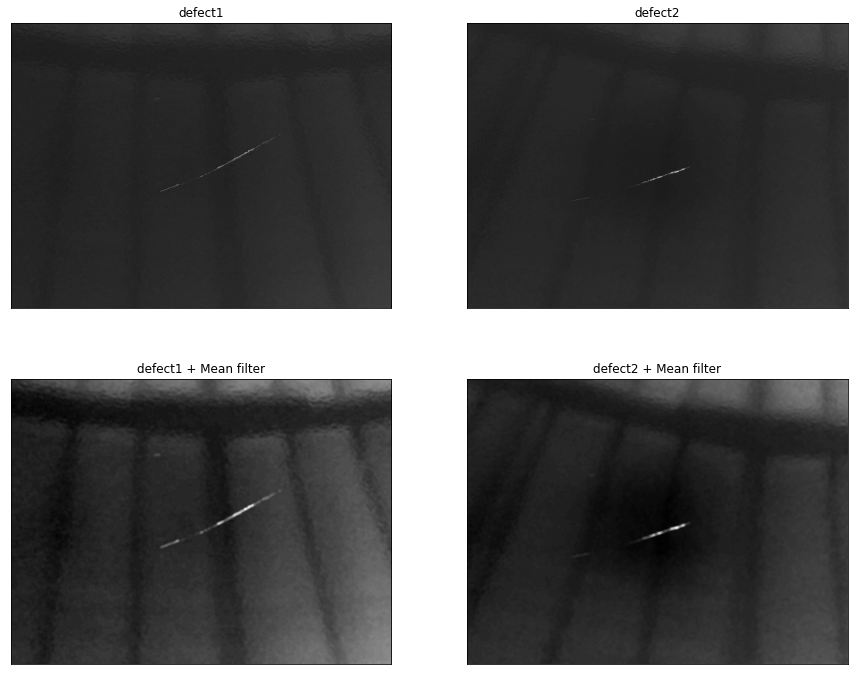

In [4]:
kernel_size = 15 # 遮罩大小
defect1_blur = cv2.blur(defect1,(kernel_size, kernel_size))
defect2_blur = cv2.blur(defect2,(kernel_size, kernel_size))

plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1"),plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2"),plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(defect1_blur, cmap='gray'),plt.title('defect1 + Mean filter')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(defect2_blur, cmap='gray'),plt.title('defect2 + Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 1.1.2 高斯濾波

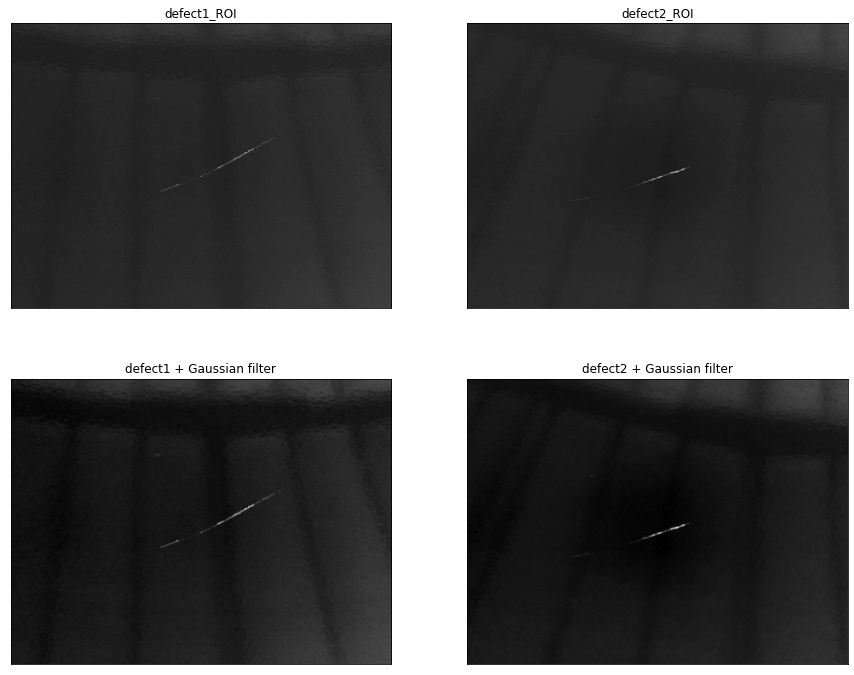

In [5]:
kernel_size = 15 # 遮罩大小
defect1_Gblur = cv2.GaussianBlur(defect1,(kernel_size, kernel_size),0)
defect2_Gblur = cv2.GaussianBlur(defect2,(kernel_size, kernel_size),0)
# 顯示影像
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1_ROI"),plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2_ROI"),plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(defect1_Gblur, cmap='gray'),plt.title('defect1 + Gaussian filter')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(defect2_Gblur, cmap='gray'),plt.title('defect2 + Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 1.1.3 中值濾波

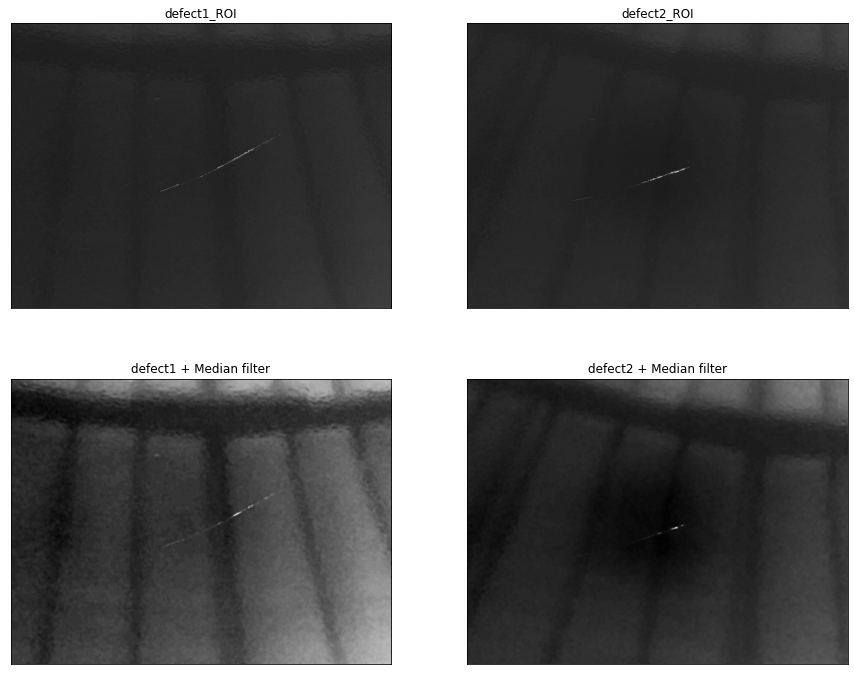

In [6]:
kernel_size = 15 # 遮罩大小
defect1_Mblur = cv2.medianBlur(defect1, kernel_size)
defect2_Mblur = cv2.medianBlur(defect2, kernel_size)

plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1_ROI"),plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2_ROI"),plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(defect1_Mblur, cmap='gray'),plt.title('defect1 + Median filter')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(defect2_Mblur, cmap='gray'),plt.title('defect2 + Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 1.1.4 比較

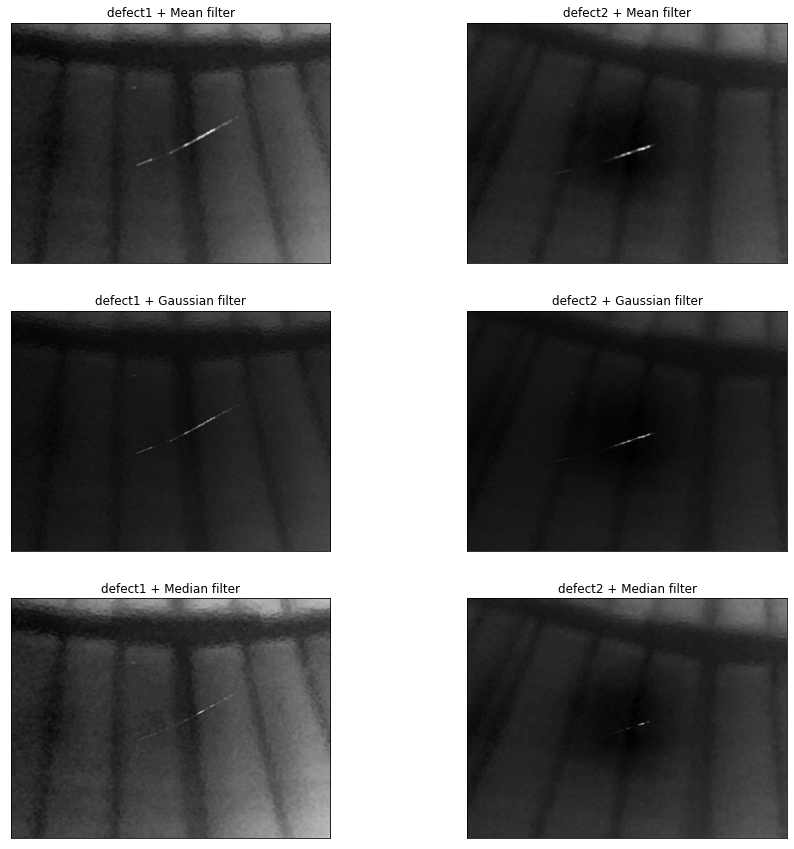

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(defect1_blur, cmap='gray'),plt.title('defect1 + Mean filter')
plt.xticks([]), plt.yticks([])
plt.subplot(322)
plt.imshow(defect2_blur, cmap='gray'),plt.title('defect2 + Mean filter')
plt.xticks([]), plt.yticks([])

plt.subplot(323)
plt.imshow(defect1_Gblur, cmap='gray'),plt.title('defect1 + Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.subplot(324)
plt.imshow(defect2_Gblur, cmap='gray'),plt.title('defect2 + Gaussian filter')
plt.xticks([]), plt.yticks([])

plt.subplot(325)
plt.imshow(defect1_Mblur, cmap='gray'),plt.title('defect1 + Median filter')
plt.xticks([]), plt.yticks([])
plt.subplot(326)
plt.imshow(defect2_Mblur, cmap='gray'),plt.title('defect2 + Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

-----------------------------------
### 1.2 銳化線條：強化物體的邊緣位置 <a id = 'space2'></a>

### 1.2.1 高通濾波 (High Pass Filter)：保持高頻部分，減少或消除低頻部分
將自己設計的矩陣，使用函式```cv2.filter2D```作為影像濾波器

以下設計兩個強度不同的高通濾波器

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

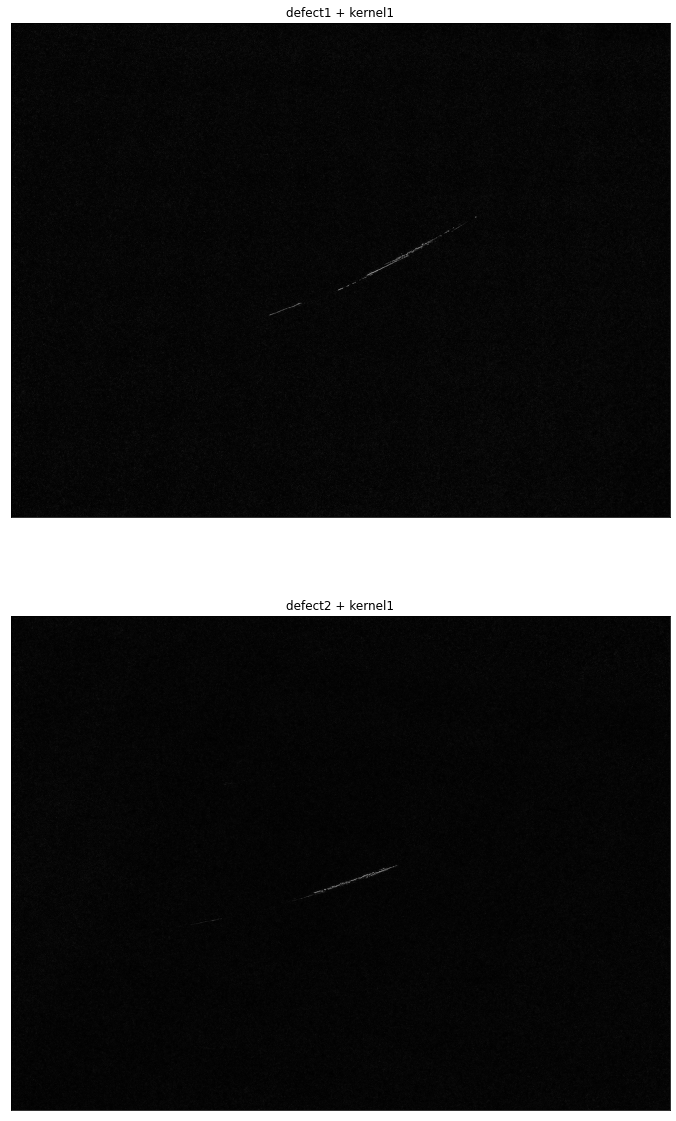

In [30]:
# 高通濾波
kernel1 = np.array([[ -1, -1, -1], 
                   [ -1, 8, -1],
                   [ -1, -1, -1]], np.float32)


defect1_HP = cv2.filter2D(defect1, -1, kernel1)
defect2_HP = cv2.filter2D(defect2, -1, kernel1)

plt.figure(figsize=(20,20))

plt.subplot(211)
plt.imshow(defect1_HP, cmap='gray'),plt.title('defect1 + kernel1')
plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(defect2_HP, cmap='gray'),plt.title('defect2 + kernel1')
plt.xticks([]), plt.yticks([])

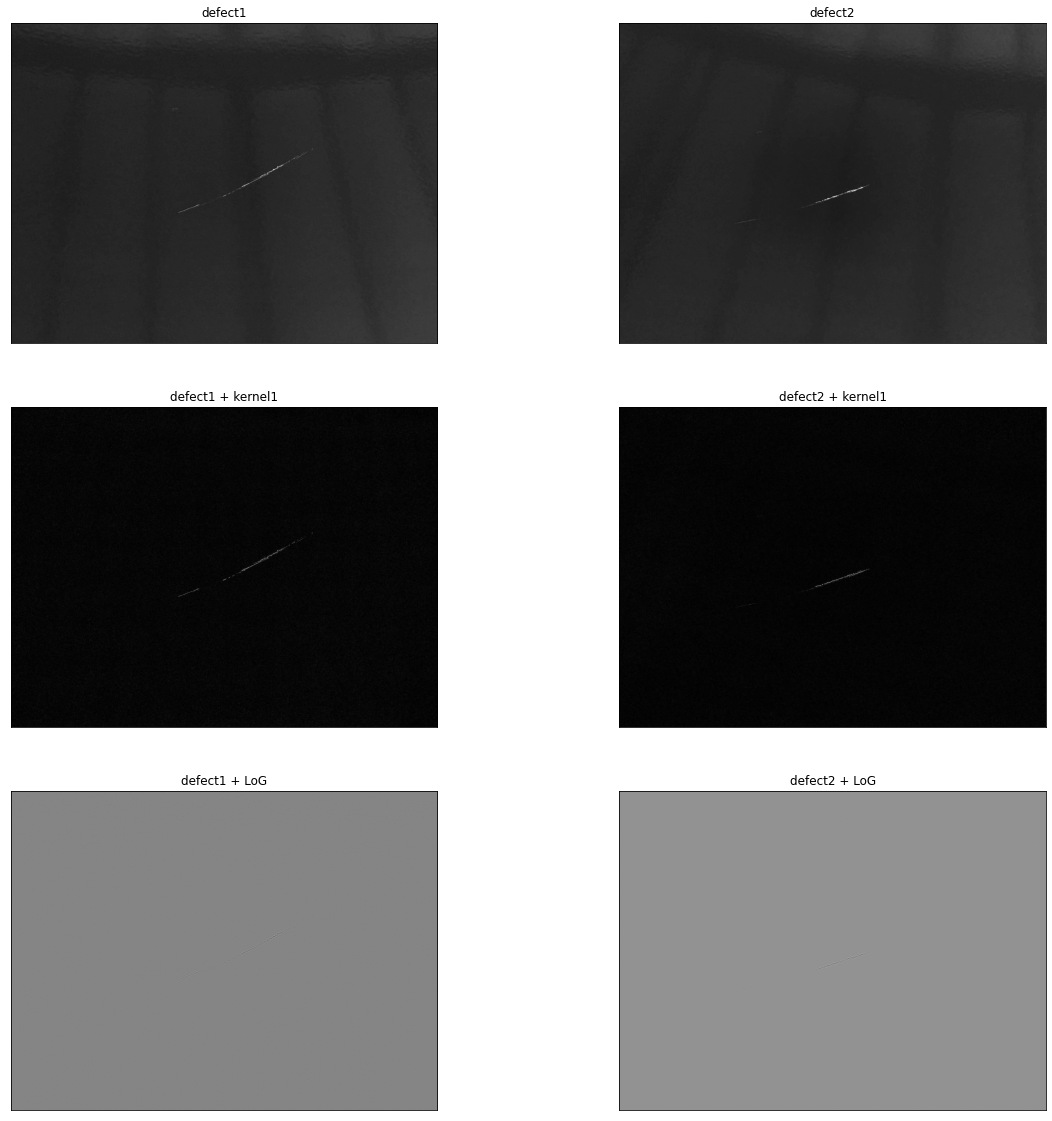

In [22]:
# 高通濾波
kernel1 = np.array([[ -1, -1, -1], 
                   [ -1, 8, -1],
                   [ -1, -1, -1]], np.float32)


defect1_HP = cv2.filter2D(defect1, -1, kernel1)
defect2_HP = cv2.filter2D(defect2, -1, kernel1)

# 拉普拉斯
def LoG(img):
    # Apply Gaussian Blur
#     blur = cv2.GaussianBlur(img,(3,3),0)
    # Apply Laplacian operator in some higher datatype
    
    laplacian = cv2.Laplacian(img,cv2.CV_64F)

    # But this tends to localize the edge towards the brighter side.
    laplacian1 = laplacian/laplacian.max()
    
    return laplacian1


defect1_LoG = LoG(defect1)
defect2_LoG = LoG(defect2)

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.imshow(defect1, cmap = "gray")
plt.title("defect1"),plt.xticks([]), plt.yticks([])
plt.subplot(322)
plt.imshow(defect2, cmap = "gray")
plt.title("defect2"),plt.xticks([]), plt.yticks([])

plt.subplot(323)
plt.imshow(defect1_HP, cmap='gray'),plt.title('defect1 + kernel1')
plt.xticks([]), plt.yticks([])
plt.subplot(324)
plt.imshow(defect2_HP, cmap='gray'),plt.title('defect2 + kernel1')
plt.xticks([]), plt.yticks([])

plt.subplot(325)
plt.imshow(defect1_LoG, cmap='gray'),plt.title('defect1 + LoG')
plt.xticks([]), plt.yticks([])
plt.subplot(326)
plt.imshow(defect2_LoG, cmap='gray'),plt.title('defect2 + LoG')
plt.xticks([]), plt.yticks([])

plt.show()

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

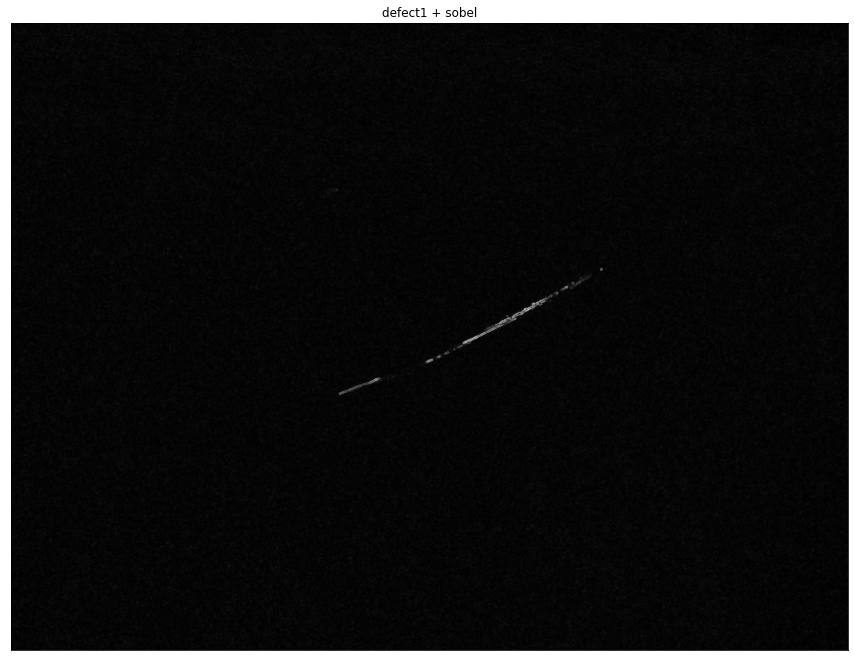

In [27]:
img = cv2.GaussianBlur(defect1,(3,3),0)

x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)
 
absX = cv2.convertScaleAbs(x) # 轉回unit8
absY = cv2.convertScaleAbs(y)
 
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray'),plt.title('defect1 + sobel')
plt.xticks([]), plt.yticks([])

# while True:
#     cv2.imshow("absX", absX)
#     cv2.imshow("absY", absY)
#     cv2.imshow("Result", dst)
    
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
        

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

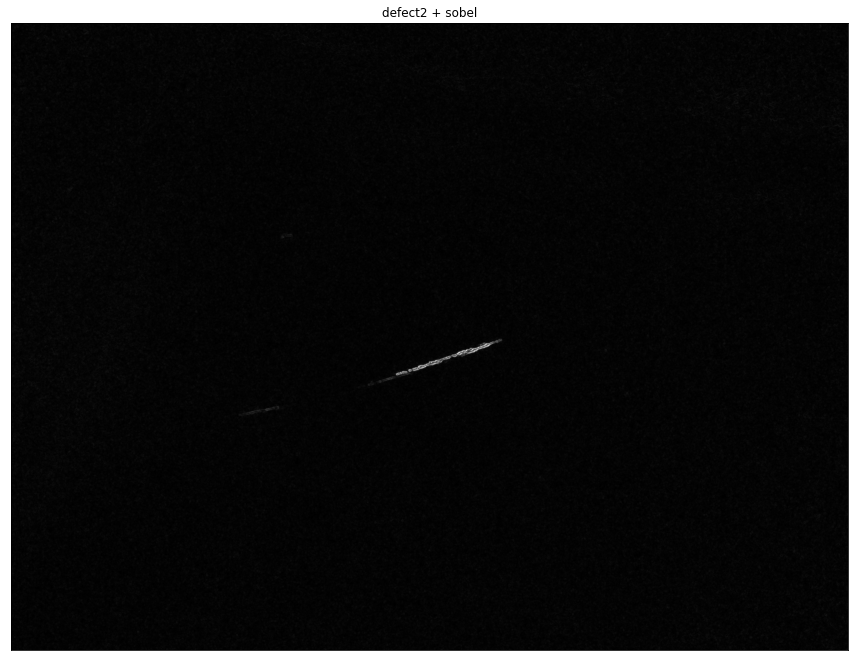

In [28]:
img = cv2.GaussianBlur(defect2,(3,3),0)

x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)
 
absX = cv2.convertScaleAbs(x) # 轉回unit8
absY = cv2.convertScaleAbs(y)
 
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray'),plt.title('defect2 + sobel')
plt.xticks([]), plt.yticks([])

----------------------------

## 2. 傅立葉轉換 <a id='fourier'></a>
### 以下執行影像的傅立葉轉換，並顯示頻譜圖，流程為：
* 取灰階影像，進行二維傅立葉轉換，取得頻率域影像
* 頻率域影像根據傅立葉轉換特性，進行**平移，將低頻像素移至中心位置**，得到影像 magnitude_spectrum，為一般提到的傅立葉轉換後的結果，**頻譜圖**

In [ ]:
# Compute the 2-dimensional discrete Fourier Transform
defect1_f = np.fft.fft2(defect1)
defect2_f = np.fft.fft2(defect2)

# 傅立葉轉換後，未做平移前的輸出影像
# 歸一化：取log 是因為顯示器顯示強度階層能力有限，用以減少過多強度階層，輸出較好的對比效果
defect1_f_org = 20 * np.log(np.abs(defect1_f))
defect2_f_org = 20* np.log(np.abs(defect2_f))

# 做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
defect1_fshift = np.fft.fftshift(defect1_f)
defect2_fshift = np.fft.fftshift(defect2_f)

defect1_magnitude_spectrum = 20 * np.log(np.abs(defect1_fshift)) # 歸一化輸出結果
defect2_magnitude_spectrum = 20 * np.log(np.abs(defect2_fshift)) # 歸一化輸出結果

plt.figure(figsize = (18,24))
plt.subplot(321), plt.imshow(defect1, cmap = "gray")
plt.title("defect1"), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(defect2, cmap = "gray")
plt.title("defect2"), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(defect1_f_org, cmap = "gray")
plt.title('defect1_f_org'), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(defect2_f_org, cmap = "gray")
plt.title("defect2_f_org"), plt.xticks([]), plt.yticks([])

plt.subplot(325), plt.imshow(defect1_magnitude_spectrum, cmap = "gray")
plt.title("defect1_magnitude_spectrum"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(defect2_magnitude_spectrum, cmap = "gray")
plt.title("defect2_magnitude_spectrum"), plt.xticks([]), plt.yticks([])

plt.show()

### 2.1 低通濾波

In [ ]:
# 傅立葉轉換
defect1_f = np.fft.fft2(defect1) 
defect2_f = np.fft.fft2(defect2)
# 做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
defect1_fshift = np.fft.fftshift(defect1_f)
defect2_fshift = np.fft.fftshift(defect2_f)

defect1_magnitude_spectrum = 20 * np.log(np.abs(defect1_fshift)) # 歸一化輸出結果
defect2_magnitude_spectrum = 20 * np.log(np.abs(defect2_fshift)) # 歸一化輸出結果
#----------------------------------
'''理想低通濾波'''
def IdealLowPassFilter(img_fshift, magnitude_spectrum):
    rows, cols = img_fshift.shape
    crow, ccol = rows//2 , cols//2
    ksize_row = int(crow*0.1)
    ksize_col = int(ccol*0.1)
    # 創建理想低通濾波器，低頻區域為 1， 高頻區域為 0
    mask = np.zeros(img_fshift.shape, np.uint8)
    mask[crow-ksize_row :crow+ksize_row , ccol-ksize_col:ccol+ksize_col] = 1
    # 濾波
    img_fshift = img_fshift*mask
    
    after_mask = magnitude_spectrum*mask
    # 反傅立葉
    img_ifshift = np.fft.ifftshift(img_fshift)
    img_back = np.fft.ifft2(img_ifshift)
    img_back = np.abs(img_back)
    return img_back ,mask ,after_mask
#----------------------------------
'''執行'''
defect1_ILP, d1ILP_mask, d1ILP_aftermask = IdealLowPassFilter(defect1_fshift, defect1_magnitude_spectrum)
defect2_ILP, d2ILP_mask, d2ILP_aftermask = IdealLowPassFilter(defect2_fshift, defect2_magnitude_spectrum)

#----------------------------------
'''顯示'''
plt.figure(figsize = (18,28))
# 低通濾波器
plt.subplot(421),plt.imshow(d1ILP_mask , cmap = "gray")
plt.title("Ideal Low Pass Filter"), plt.xticks([]), plt.yticks([])
# 傅立葉轉換頻譜圖
plt.subplot(423),plt.imshow(defect1_magnitude_spectrum, cmap = "gray")
plt.title("defect1_magnitude_spectrum"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(defect2_magnitude_spectrum, cmap = "gray")
plt.title("defect2_magnitude_spectrum"), plt.xticks([]), plt.yticks([])
# 濾波後 頻譜圖
plt.subplot(425),plt.imshow(d1ILP_aftermask, cmap = "gray")
plt.title("defect1_aftermask"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(d2ILP_aftermask, cmap = "gray")
plt.title("defect2_aftermask"), plt.xticks([]), plt.yticks([])
# 反傅立葉轉換濾波完成的影像
plt.subplot(427),plt.imshow(defect1_ILP, cmap = "gray")
plt.title("defect1 + Ideal Low Pass Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(defect2_ILP, cmap = "gray")
plt.title("defect2 + Ideal Low Pass Filter"), plt.xticks([]), plt.yticks([])

plt.show()

### 2.2高通濾波

In [ ]:
# 傅立葉轉換
defect1_f = np.fft.fft2(defect1) 
defect2_f = np.fft.fft2(defect2)
# 做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
defect1_fshift = np.fft.fftshift(defect1_f)
defect2_fshift = np.fft.fftshift(defect2_f)

defect1_magnitude_spectrum = 20 * np.log(np.abs(defect1_fshift)) # 歸一化輸出結果
defect2_magnitude_spectrum = 20 * np.log(np.abs(defect2_fshift)) # 歸一化輸出結果

#----------------------------------
'''理想高通濾波'''
def IdealHighPassFilter(img_fshift, magnitude_spectrum):
    rows, cols = img_fshift.shape
    crow, ccol = rows//2 , cols//2
    ksize_row = int(crow*0.1)
    ksize_col = int(ccol*0.1)
    # 創建理想高通濾波器，低頻區域為 0， 高頻區域為 1
    mask = np.ones(img_fshift.shape, np.uint8)
    mask[crow-ksize_row :crow+ksize_row , ccol-ksize_col:ccol+ksize_col] = 0
    # 濾波
    img_fshift = img_fshift*mask
    
    after_mask = magnitude_spectrum*mask
    # 反傅立葉
    img_ifshift = np.fft.ifftshift(img_fshift)
    img_back = np.fft.ifft2(img_ifshift)
    img_back = np.abs(img_back)
    return img_back ,mask ,after_mask

#------------------------------------
'''執行'''
defect1_IHP, d1IHP_mask, d1IHP_aftermask = IdealHighPassFilter(defect1_fshift, defect1_magnitude_spectrum)
defect2_IHP, d2IHP__mask, d2IHP__aftermask = IdealHighPassFilter(defect2_fshift, defect2_magnitude_spectrum)

'''顯示'''
plt.figure(figsize = (18,28))
# 高通濾波器
plt.subplot(421),plt.imshow(d1IHP_mask , cmap = "gray")
plt.title("Ideal High Pass Filter"), plt.xticks([]), plt.yticks([])
# 傅立葉轉換頻譜圖
plt.subplot(423),plt.imshow(defect1_magnitude_spectrum, cmap = "gray")
plt.title("defect1_magnitude_spectrum"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(defect2_magnitude_spectrum, cmap = "gray")
plt.title("defect2_magnitude_spectrum"), plt.xticks([]), plt.yticks([])
# 濾波後 頻譜圖
plt.subplot(425),plt.imshow(d1IHP_aftermask, cmap = "gray")
plt.title("defect1_aftermask"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(d2IHP__aftermask, cmap = "gray")
plt.title("defect2_aftermask"), plt.xticks([]), plt.yticks([])
# 反傅立葉轉換濾波完成的影像
plt.subplot(427),plt.imshow(defect1_IHP, cmap = "gray")
plt.title("defect1 + Ideal High Pass Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(defect2_IHP, cmap = "gray")
plt.title("defect2 + Ideal High Pass Filter"), plt.xticks([]), plt.yticks([])

plt.show()

--------------------------------

## 3. 方法介紹 <a id = 'learn'></a>

### 3.1 雜訊
使用skimage套件，設定需要的雜訊模式，如高斯雜訊"gaussian", 鹽與胡椒雜訊"s&p"

In [ ]:
import skimage
img = cv2.imread('./images/lena.png', 0)
# 高斯雜訊
noise_img_gauss = skimage.util.random_noise(img, mode="gaussian")
# The above function returns a floating-point image on the range [0, 1], changed it to 'uint8' and from [0,255]
noise_img_gauss = np.array(255*noise_img_gauss, dtype = 'uint8')

# 鹽與胡椒雜訊
noise_img_snp = skimage.util.random_noise(img, mode="s&p")
# The above function returns a floating-point image on the range [0, 1], changed it to 'uint8' and from [0,255]
noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')

# 顯示
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(noise_img_gauss, cmap = "gray")
plt.title("Gaussian noise"),plt.axis("off")

plt.subplot(122)
plt.imshow(noise_img_snp, cmap = "gray")
plt.title("Salt&peper noise"),plt.axis("off")

plt.show()

### 3.2. 低通濾波器：影像平滑化

### 3.2.1 均值濾波 (Mean Filter)
使用OpenCV函式 ```cv2.blur()``` 執行均值濾波動作，遮罩(kernel)大小越大，取越大範圍像素進行平均，模糊效果越強

In [ ]:
img = cv2.imread('./images/lena.png', 0)

# 設定遮罩大小
kernel_size = 9

new_image = cv2.blur(img,(kernel_size, kernel_size))

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.2.2 高斯濾波 (Gaussian Filter)

In [ ]:
img = cv2.imread('./images/lena.png', 0)
new_image_gauss = cv2.GaussianBlur(img,(kernel_size, kernel_size),0)

plt.figure(figsize=(11,6))

plt.subplot(121)
plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])

plt.show()

### 3.2.3 中值濾波 (Median Filter)

In [ ]:
img = cv2.imread('./images/lena.png', 0)
new_image = cv2.medianBlur(img, kernel_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.2.4 平滑濾波器處理雜訊影像

In [ ]:
# 均值濾波 (Mean Filter)
img_g_B = cv2.blur(noise_img_gauss,(kernel_size, kernel_size))
img_snp_B = cv2.blur(noise_img_snp,(kernel_size, kernel_size))

# 高斯濾波 (Gaussian Filter)
img_g_GB = cv2.GaussianBlur(noise_img_gauss,(kernel_size, kernel_size),0)
img_snp_GB = cv2.GaussianBlur(noise_img_snp,(kernel_size, kernel_size),0)

# # 中值濾波 (Median Filter)
img_g_MB = cv2.medianBlur(noise_img_gauss, kernel_size)
img_snp_MB = cv2.medianBlur(noise_img_snp, kernel_size)

plt.figure(figsize=(16,26))
#
plt.subplot(421)
plt.imshow(noise_img_gauss, cmap='gray'),plt.title('Gaussian noise')
plt.xticks([]), plt.yticks([])
plt.subplot(422)
plt.imshow(noise_img_snp, cmap='gray'),plt.title('Salt and pepper noise')
plt.xticks([]), plt.yticks([])
#
plt.subplot(423)
plt.imshow(img_g_B, cmap='gray'),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(424)
plt.imshow(img_snp_B, cmap='gray'),plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
#
plt.subplot(425)
plt.imshow(img_g_GB, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(426)
plt.imshow(img_snp_GB, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])

plt.subplot(427)
plt.imshow(img_g_MB, cmap='gray'),plt.title('Median Filter ')
plt.xticks([]), plt.yticks([])

plt.subplot(428)
plt.imshow(img_snp_MB, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])

plt.show()

### 3.3 高通濾波器(High Pass Filter)：影像銳化
將自己設計的矩陣，使用函式```cv2.filter2D```作為影像濾波器

以下設計兩個強度不同的高通濾波器

In [ ]:
kernel_1 = np.array([[ 0, -1, 0], 
                   [ -1, 5, -1],
                   [ 0, -1, 0]], np.float32)

kernel_2 = np.array([[ -1, -1, -1], 
                   [ -1, 8, -1],
                   [ -1, -1, -1]], np.float32)
# 將自己設計的濾波套用至cv2.filter2D()
img_HPk1 = cv2.filter2D(img, -1, kernel_1)
img_HPk2 = cv2.filter2D(img, -1, kernel_2)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(img, cmap = "gray")
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(img_HPk1, cmap = "gray")
plt.title("kernel1"),plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img_HPk2, cmap = "gray")
plt.title("kernel2"),plt.xticks([]), plt.yticks([])

plt.show()

### 3.4. 傅立葉轉換
### 以下執行影像的傅立葉轉換，流程為：
* 取灰階影像，進行二維傅立葉轉換，取得頻率域影像 fourier_show
* 頻率域影像根據傅立葉轉換特性，進行**平移，將低頻像素移至中心位置**，得到影像 magnitude_spectrum，為一般提到的傅立葉轉換後的結果
* 進行**頻譜強度值變動**後，再反平移，並反傅立葉轉換，取得影像 img_back

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('./images/lena.png', 0)

f = np.fft.fft2(img) # Compute the 2-dimensional discrete Fourier Transform

# 傅立葉轉換後，未做平移前的輸出影像
# 歸一化：取log 是因為顯示器顯示強度階層能力有限，用以減少過多強度階層，輸出較好的對比效果
fourier_org = 20 * np.log(np.abs(f))

# 做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift)) # 歸一化輸出結果

plt.figure(figsize = (18,12))
plt.subplot(131), plt.imshow(img, cmap = "gray")
plt.title("Input"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(fourier_org, cmap = "gray")
plt.title("fourier_org"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(magnitude_spectrum, cmap = "gray")
plt.title('magnitude_spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

### 3.4.1 不同影像的傅立葉轉換比較

In [ ]:
def fourier_one_img(img):
    f = np.fft.fft2(img) # Compute the 2-dimensional discrete Fourier Transform
    # 做平移將低頻的部分移到中間，以呈現強度頻譜
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift)) # 歸一化輸出結果
    
    plt.figure(figsize = (10,8))
    plt.subplot(121)
    plt.imshow(img, cmap = "gray")
    plt.title("Input"), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(magnitude_spectrum, cmap = "gray")
    plt.title('magnitude_spectrum'), plt.xticks([]), plt.yticks([])

    plt.show()

### 簡單圖形影像，執行傅立葉轉換

In [ ]:
img = cv2.imread('./images/square1.png', 0)
fourier_one_img(img)

img = cv2.imread('./images/square2.png', 0)
fourier_one_img(img)

### 手寫字母影像，執行傅立葉轉換

In [ ]:
img = cv2.imread('./images/A_11.jpg', 0)
fourier_one_img(img)
img = cv2.imread('./images/A_12.jpg', 0)
fourier_one_img(img)
img = cv2.imread('./images/A_13.jpg', 0)

fourier_one_img(img)
img = cv2.imread('./images/B.jpg', 0)
fourier_one_img(img)

img = cv2.imread('./images/C.jpg', 0)
fourier_one_img(img)

img = cv2.imread('./images/D.jpg', 0)
fourier_one_img(img)

### 3.4.2 頻率域上的濾波
#### 理想低通濾波

In [ ]:
# 傅立葉轉換
img = cv2.imread('./images/lena.png', 0)
f = np.fft.fft2(img) # Compute the 2-dimensional discrete Fourier Transform
# 傅立葉轉換後 做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift)) # 歸一化輸出結果

#----------------------------------
'''理想低通濾波'''
def Idealdefect2PassFilter(img_fshift, magnitude_spectrum):
    rows, cols = img_fshift.shape
    crow, ccol = rows//2 , cols//2
    # 創建理想低通濾波器，低頻區域為 1， 高頻區域為 0
    mask = np.zeros(img_fshift.shape, np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    
    # 濾波
    img_fshift = img_fshift*mask
    
    after_mask = magnitude_spectrum*mask
    # 反傅立葉
    img_ifshift = np.fft.ifftshift(img_fshift)
    img_back = np.fft.ifft2(img_ifshift)
    img_back = np.abs(img_back)
    return img_back ,mask ,after_mask

#----------------------------------
'''執行'''
img_ILP, mask, f_aftermask = Idealdefect2PassFilter(fshift, magnitude_spectrum)

#----------------------------------
'''顯示'''
plt.figure(figsize = (10,10))
# 低通濾波器
plt.subplot(221),plt.imshow(mask , cmap = "gray")
plt.title("Ideal defect2 Pass Filter"), plt.xticks([]), plt.yticks([])
# 原始影像經過傅立葉轉換頻譜圖
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = "gray")
plt.title("magnitude_spectrum"), plt.xticks([]), plt.yticks([])

# 濾波後 頻譜圖
plt.subplot(223),plt.imshow(f_aftermask, cmap = "gray")
plt.title("foureir after mask"), plt.xticks([]), plt.yticks([])

# 反傅立葉轉換濾波完成的影像
plt.subplot(224),plt.imshow(img_ILP, cmap = "gray")
plt.title("image + Ideal defect2 Pass Filter"), plt.xticks([]), plt.yticks([])

plt.show()

#### 理想高通濾波

In [ ]:
# 傅立葉轉換
img = cv2.imread('./images/lena.png', 0)
f = np.fft.fft2(img) # Compute the 2-dimensional discrete Fourier Transform
# 傅立葉轉換後，做平移將低頻的部分移到中間，高頻移至外圍，以呈現強度頻譜
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift)) # 歸一化輸出結果

#----------------------------------
'''理想高通濾波'''
def IdealHighPassFilter(img_fshift, magnitude_spectrum):
    rows, cols = img_fshift.shape
    crow, ccol = rows//2 , cols//2
    # 創建理想低通濾波器，低頻區域為 0， 高頻區域為 1
    mask = np.ones(img_fshift.shape, np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0
    # 濾波
    img_fshift = img_fshift*mask
    
    after_mask = magnitude_spectrum*mask
    # 反傅立葉
    img_ifshift = np.fft.ifftshift(img_fshift)
    img_back = np.fft.ifft2(img_ifshift)
    img_back = np.abs(img_back)
    return img_back ,mask ,after_mask

#----------------------------------
'''執行'''
img_IHP, mask, f_aftermask = IdealHighPassFilter(fshift, magnitude_spectrum)

#----------------------------------
'''顯示'''
plt.figure(figsize = (10,10))
# 高通濾波器
plt.subplot(221),plt.imshow(mask , cmap = "gray")
plt.title("Ideal High Pass Filter"), plt.xticks([]), plt.yticks([])
# 原始影像經過傅立葉轉換頻譜圖
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = "gray")
plt.title("magnitude_spectrum"), plt.xticks([]), plt.yticks([])

# 濾波後 頻譜圖
plt.subplot(223),plt.imshow(f_aftermask, cmap = "gray")
plt.title("foureir after mask"), plt.xticks([]), plt.yticks([])

# 反傅立葉轉換濾波完成的影像
plt.subplot(224),plt.imshow(img_IHP, cmap = "gray")
plt.title("image + Ideal High Pass Filter"), plt.xticks([]), plt.yticks([])

plt.show()